In [49]:
import os
import json
#path = '/data3/ian/dsmil-wsi/dsmil-wsi/vit_02192023_1_14ep.json'
path = '/data3/ian/dsmil-wsi/dsmil-wsi/vit_05172023_LR_0.0008_BLOSS_0.9_POS_0_HEAD_2_BLOCK_2_LANDMARK_2048_ms_fusion_11_71.json'
gt_path = '/data1/ian/C16_training_small/C16_test_mask/'
gt_list = os.listdir(gt_path)
fp = open(path,'r')
data = json.load(fp)
print(len(data))
max_score = 0
for i in range(10,99):
    th = i/100
    pos_list = []
    neg_list = []
    sum = 0
    for k in data:
        if data[k] > th:
            pos_list.append(k)
        else:
            neg_list.append(k)
            
    #print(result_list)
    for d in pos_list:
        #print(d+'.png')
        file = d+'.png'
        if file in gt_list:
            sum += 1
    #print(sorted(pos_list))
    #print(len(pos_list))
    for d in neg_list:
        #print(d+'.png')
        file = d+'.png'
        if file not in gt_list:
            sum += 1
    
    #print(sorted(neg_list))
    #print(len(neg_list))  
    print('threshold: ' + str(th) )
    score = sum/len(data)
    print(score)
    if max_score < score:
        max_score = score
print(max_score)
    #print(data)

124
threshold: 0.1
0.8870967741935484
threshold: 0.11
0.8870967741935484
threshold: 0.12
0.8870967741935484
threshold: 0.13
0.8870967741935484
threshold: 0.14
0.8870967741935484
threshold: 0.15
0.8870967741935484
threshold: 0.16
0.8870967741935484
threshold: 0.17
0.8790322580645161
threshold: 0.18
0.8790322580645161
threshold: 0.19
0.8870967741935484
threshold: 0.2
0.8870967741935484
threshold: 0.21
0.8870967741935484
threshold: 0.22
0.8790322580645161
threshold: 0.23
0.8790322580645161
threshold: 0.24
0.8790322580645161
threshold: 0.25
0.8790322580645161
threshold: 0.26
0.8870967741935484
threshold: 0.27
0.8870967741935484
threshold: 0.28
0.8790322580645161
threshold: 0.29
0.8790322580645161
threshold: 0.3
0.8790322580645161
threshold: 0.31
0.8790322580645161
threshold: 0.32
0.8790322580645161
threshold: 0.33
0.8790322580645161
threshold: 0.34
0.8790322580645161
threshold: 0.35
0.8790322580645161
threshold: 0.36
0.8790322580645161
threshold: 0.37
0.8790322580645161
threshold: 0.38
0.8

In [9]:
import os
import json
path = '/data3/ian/dsmil-wsi/dsmil-wsi/tcga_vit_02252023_best_split1.json'

LUAD_file = '/data2/ian/LUAD.txt'
LUSC_file = '/data2/ian/LUSC.txt'
LUAD = []
LUSC = []

with open (LUAD_file, 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        ids ,f_name,_,_,_ = line.split('\t')
        if f_name == 'filename':
            continue
        LUAD.append(f_name[:23].strip('.'))
        
with open (LUSC_file, 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        ids ,f_name,_,_,_ = line.split('\t')
        if f_name == 'filename':
            continue
        LUSC.append(f_name[:23].strip('.'))
        
#print(LUAD)
#print(LUSC)

fp = open(path,'r')
data = json.load(fp)
print(len(data))
max_score = 0
max_th1 = 0

for i in range(0,10000):
    predict_LUAD = []
    predict_LUSC = []
    sum = 0
    th = i/10000

    for k in data:
        #print(data[k])
        if data[k] < th:
            predict_LUAD.append(k)
        else:
            predict_LUSC.append(k)


    #print(len(predict_LUAD))
    #print(len(predict_LUSC))
    for d in predict_LUAD:
        file = d
        if file in LUAD:
            sum += 1

    for d in predict_LUSC:
        file = d
        if file in LUSC:
            sum += 1
    #print('threshold1: ' + str(th1) )
    #print('threshold2: ' + str(th2) )
    score = sum/len(data)
    #print(score)
    if score > max_score:
        max_score = score
        max_th1 = th
print(max_score)
print(max_th1)


187
0.8235294117647058
0.0113


In [91]:
import os
import json
path = '/data3/ian/dsmil-wsi/dsmil-wsi/tcga_vit_02212023_1cls_08_23ep.json'

LUAD_file = '/data2/ian/LUAD.txt'
LUSC_file = '/data2/ian/LUSC.txt'
LUAD = []
LUSC = []

with open (LUAD_file, 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        ids ,f_name,_,_,_ = line.split('\t')
        if f_name == 'filename':
            continue
        LUAD.append(f_name[:23].strip('.'))
        
with open (LUSC_file, 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        ids ,f_name,_,_,_ = line.split('\t')
        if f_name == 'filename':
            continue
        LUSC.append(f_name[:23].strip('.'))
        
#print(LUAD)
#print(LUSC)

fp = open(path,'r')
data = json.load(fp)
print(len(data))
max_score = 0
max_th1 = 0

for i in range(0,10000):
    predict_LUAD = []
    predict_LUSC = []
    sum = 0
    th = i/10000

    for k in data:
        #print(data[k])
        if data[k] < th:
            predict_LUAD.append(k)
        else:
            predict_LUSC.append(k)


    #print(len(predict_LUAD))
    #print(len(predict_LUSC))
    for d in predict_LUAD:
        file = d
        if file in LUAD:
            sum += 1

    for d in predict_LUSC:
        file = d
        if file in LUSC:
            sum += 1
    #print('threshold1: ' + str(th1) )
    #print('threshold2: ' + str(th2) )
    score = sum/len(data)
    #print(score)
    if score > max_score:
        max_score = score
        max_th1 = th
print(max_score)
print(max_th1)


187
0.839572192513369
0.2485


In [80]:
import os
import json
path = '/data3/ian/dsmil-wsi/dsmil-wsi/tcga_vit_02212023_1cls_08_23ep.json'

LUAD_file = '/data2/ian/LUAD.txt'
LUSC_file = '/data2/ian/LUSC.txt'
LUAD = []
LUSC = []

with open (LUAD_file, 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        ids ,f_name,_,_,_ = line.split('\t')
        if f_name == 'filename':
            continue
        LUAD.append(f_name[:23].strip('.'))
        
with open (LUSC_file, 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        ids ,f_name,_,_,_ = line.split('\t')
        if f_name == 'filename':
            continue
        LUSC.append(f_name[:23].strip('.'))
        
#print(LUAD)
#print(LUSC)

fp = open(path,'r')
data = json.load(fp)
print(len(data))
max_score = 0
max_th1 = 0
max_th2 = 0
best_LUAD = []
best_LUSC = []

for i in range(0,1000):
    for j in range(0,1000):
        predict_LUAD = []
        predict_LUSC = []
        sum = 0
        th1 = i/1000
        th2 = j/1000
    
        for k in data:
            #print(data[k])
            
            gap1 = abs(data[k][0] - th1)
            gap2 = abs(data[k][1] - th2)
            if gap1 < gap2:
                #print(data[k][0])
                predict_LUAD.append(k)
            else:
                
                predict_LUSC.append(k)
            
            
        #print(len(predict_LUAD))
        #print(len(predict_LUSC))
        for d in predict_LUAD:
            file = d
            if file in LUAD:
                sum += 1

        for d in predict_LUSC:
            file = d
            if file in LUSC:
                sum += 1
        #print('threshold1: ' + str(th1) )
        #print('threshold2: ' + str(th2) )
        score = sum/len(data)
        #print(score)
        if score > max_score:
            max_score = score
            max_th1 = th1
            max_th2 = th2
            best_LUAD = predict_LUAD
            best_LUSC = predict_LUSC
print(max_score)
print(max_th1)
print(max_th2)
print(len(best_LUAD))
print(len(best_LUSC))

187


TypeError: 'float' object is not subscriptable

In [ ]:
import os
import json
path = '/data3/ian/dsmil-wsi/dsmil-wsi/tcga_vit_02192023.json'

LUAD_file = '/data2/ian/LUAD.txt'
LUSC_file = '/data2/ian/LUSC.txt'
LUAD = []
LUSC = []

with open (LUAD_file, 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        ids ,f_name,_,_,_ = line.split('\t')
        if f_name == 'filename':
            continue
        LUAD.append(f_name[:23].strip('.'))
        
with open (LUSC_file, 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        ids ,f_name,_,_,_ = line.split('\t')
        if f_name == 'filename':
            continue
        LUSC.append(f_name[:23].strip('.'))
        
#print(LUAD)
#print(LUSC)

fp = open(path,'r')
data = json.load(fp)
print(len(data))
max_score = 0
max_th1 = 0
max_th2 = 0
best_LUAD = []
best_LUSC = []

for i in range(0,1000):
    for j in range(0,1000):
        predict_LUAD = []
        predict_LUSC = []
        sum = 0
        th1 = i/1000
        th2 = j/1000
    
        for k in data:
            #print(data[k])
            
            gap1 = abs(data[k][0] - th1)
            gap2 = abs(data[k][1] - th2)
            if gap1 < gap2:
                #print(data[k][0])
                predict_LUAD.append(k)
            else:
                
                predict_LUSC.append(k)
            
            
        #print(len(predict_LUAD))
        #print(len(predict_LUSC))
        for d in predict_LUAD:
            file = d
            if file in LUAD:
                sum += 1

        for d in predict_LUSC:
            file = d
            if file in LUSC:
                sum += 1
        #print('threshold1: ' + str(th1) )
        #print('threshold2: ' + str(th2) )
        score = sum/len(data)
        #print(score)
        if score > max_score:
            max_score = score
            max_th1 = th1
            max_th2 = th2
            best_LUAD = predict_LUAD
            best_LUSC = predict_LUSC
print(max_score)
print(max_th1)
print(max_th2)
print(len(best_LUAD))
print(len(best_LUSC))

In [86]:
import os
import json
#path = '/data3/ian/dsmil-wsi/dsmil-wsi/tcga_vit_02192023.json'
path = '/data3/ian/dsmil-wsi/dsmil-wsi/tcga_vit_02202023_08_12ep.json'
LUAD_file = '/data2/ian/LUAD.txt'
LUSC_file = '/data2/ian/LUSC.txt'
LUAD = []
LUSC = []

with open (LUAD_file, 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        ids ,f_name,_,_,_ = line.split('\t')
        if f_name == 'filename':
            continue
        LUAD.append(f_name[:23].strip('.'))
        
with open (LUSC_file, 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        ids ,f_name,_,_,_ = line.split('\t')
        if f_name == 'filename':
            continue
        LUSC.append(f_name[:23].strip('.'))
        
#print(LUAD)
#print(LUSC)

fp = open(path,'r')
data = json.load(fp)
print(len(data))
max_score = 0
max_th1 = 0
best_LUAD = []
best_LUSC = []

for i in range(0,1000):
    predict_LUAD = []
    predict_LUSC = []
    sum = 0
    th1 = i/1000

    for k in data:
        #print(data[k])
        if data[k][0] > th1:
            predict_LUAD.append(k)
        else:
            predict_LUSC.append(k)

    #print(len(predict_LUAD))
    #print(len(predict_LUSC))
    for d in predict_LUAD:
        file = d
        if file in LUAD:
            sum += 1

    for d in predict_LUSC:
        file = d
        if file in LUSC:
            sum += 1
    #print('threshold1: ' + str(th1) )
    #print('threshold2: ' + str(th2) )
    score = sum/len(data)
    #print(score)
    
    if score > max_score:
        max_score = score
        max_th1 = th1
        best_LUAD = predict_LUAD
        best_LUSC = predict_LUSC
print(max_score)
print(max_th1)
print(len(best_LUAD))
print(len(best_LUSC))

187


TypeError: 'float' object is not subscriptable

In [12]:
path = '/data3/ian/dsmil-wsi/dsmil-wsi/test/patches'
files = os.listdir(path)
count = 0
for f in files:
    if f in LUAD:
        count += 1
print(count)

96


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
def multi_label_roc(labels, predictions, num_classes, pos_label=1):
    fprs = []
    tprs = []
    thresholds = []
    thresholds_optimal = []
    aucs = []
    if len(predictions.shape)==1:
        predictions = predictions[:, None]
    for c in range(0, num_classes):
        #label = labels[:, c]
        #prediction = predictions[:, c]
        fpr, tpr, threshold = roc_curve(labels, predictions, pos_label=1)
        
        

        fpr_optimal, tpr_optimal, threshold_optimal = optimal_thresh(fpr, tpr, threshold)
        c_auc = roc_auc_score(labels, predictions)
        aucs.append(c_auc)
        thresholds.append(threshold)
        thresholds_optimal.append(threshold_optimal)
        
        
        
    return aucs, thresholds, thresholds_optimal, fpr, tpr

def optimal_thresh(fpr, tpr, thresholds, p=0):
    loss = (fpr - tpr) - p * tpr / (fpr + tpr + 1)
    idx = np.argmin(loss, axis=0)
    return fpr[idx], tpr[idx], thresholds[idx]

In [116]:
import numpy as np
import os
import json
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_fscore_support
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

path = '/data3/ian/dsmil-wsi/dsmil-wsi/predict_logs/C16/vit_02192023_1_14ep.json'
#path = '/data3/ian/dsmil-wsi/dsmil-wsi/predict_logs/C16/vit_05172023_LR_0.0008_BLOSS_0.9_POS_0_HEAD_2_BLOCK_2_LANDMARK_2048_ms_fusion_11_71.json'
gt_path = '/data1/ian/C16_training_small/C16_test_mask/'
gt_list = os.listdir(gt_path)
fp = open(path,'r')
data = json.load(fp)

gt = np.array([])
predict = np.array([])

for k in data:
    if k+'.png' in gt_list:
        gt=np.append(gt,1)
    else:
        gt=np.append(gt ,0)
    predict=np.append(predict,data[k])
    
#print(predict)
#print(gt)

auc_value, _, thresholds_optimal, fpr_origin, tpr_origin = multi_label_roc(gt, predict, 1, pos_label=1)
#l1, = plt.plot(fpr, tpr, color = 'red', label = 'L1')
predict = np.where(predict>=thresholds_optimal[0], 1, 0)
f1 = f1_score(gt, predict)
print(f1)


print(auc_value)
print(thresholds_optimal)

0.8913043478260869
[0.9592735277930654]
[0.7700265645980835]


In [117]:
import numpy as np
import os
import json
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_fscore_support
import scikitplot as skplt
import matplotlib.pyplot as plt

path = '/data3/ian/dsmil-wsi/dsmil-wsi/predict_logs/C16/vit_04172023_with_pos_3.json'
#path = '/data3/ian/dsmil-wsi/dsmil-wsi/predict_logs/C16/vit_05172023_LR_0.0008_BLOSS_0.9_POS_0_HEAD_2_BLOCK_2_LANDMARK_2048_ms_fusion_11_71.json'
gt_path = '/data1/ian/C16_training_small/C16_test_mask/'
gt_list = os.listdir(gt_path)
fp = open(path,'r')
data = json.load(fp)

gt = np.array([])
predict = np.array([])

for k in data:
    if k+'.png' in gt_list:
        gt=np.append(gt,1)
    else:
        gt=np.append(gt ,0)
    predict=np.append(predict,data[k])
    
#print(predict)
#print(gt)

auc_value, _, thresholds_optimal, fpr_pos, tpr_pos = multi_label_roc(gt, predict, 1, pos_label=1)
#l1, = plt.plot(fpr, tpr, color = 'red', label = 'L1')
predict = np.where(predict>=thresholds_optimal[0], 1, 0)
f1 = f1_score(gt, predict)
print(f1)

print(auc_value)
print(thresholds_optimal)

0.8965517241379309
[0.9383599339570721]
[0.7071126967668534]


0.927536231884058


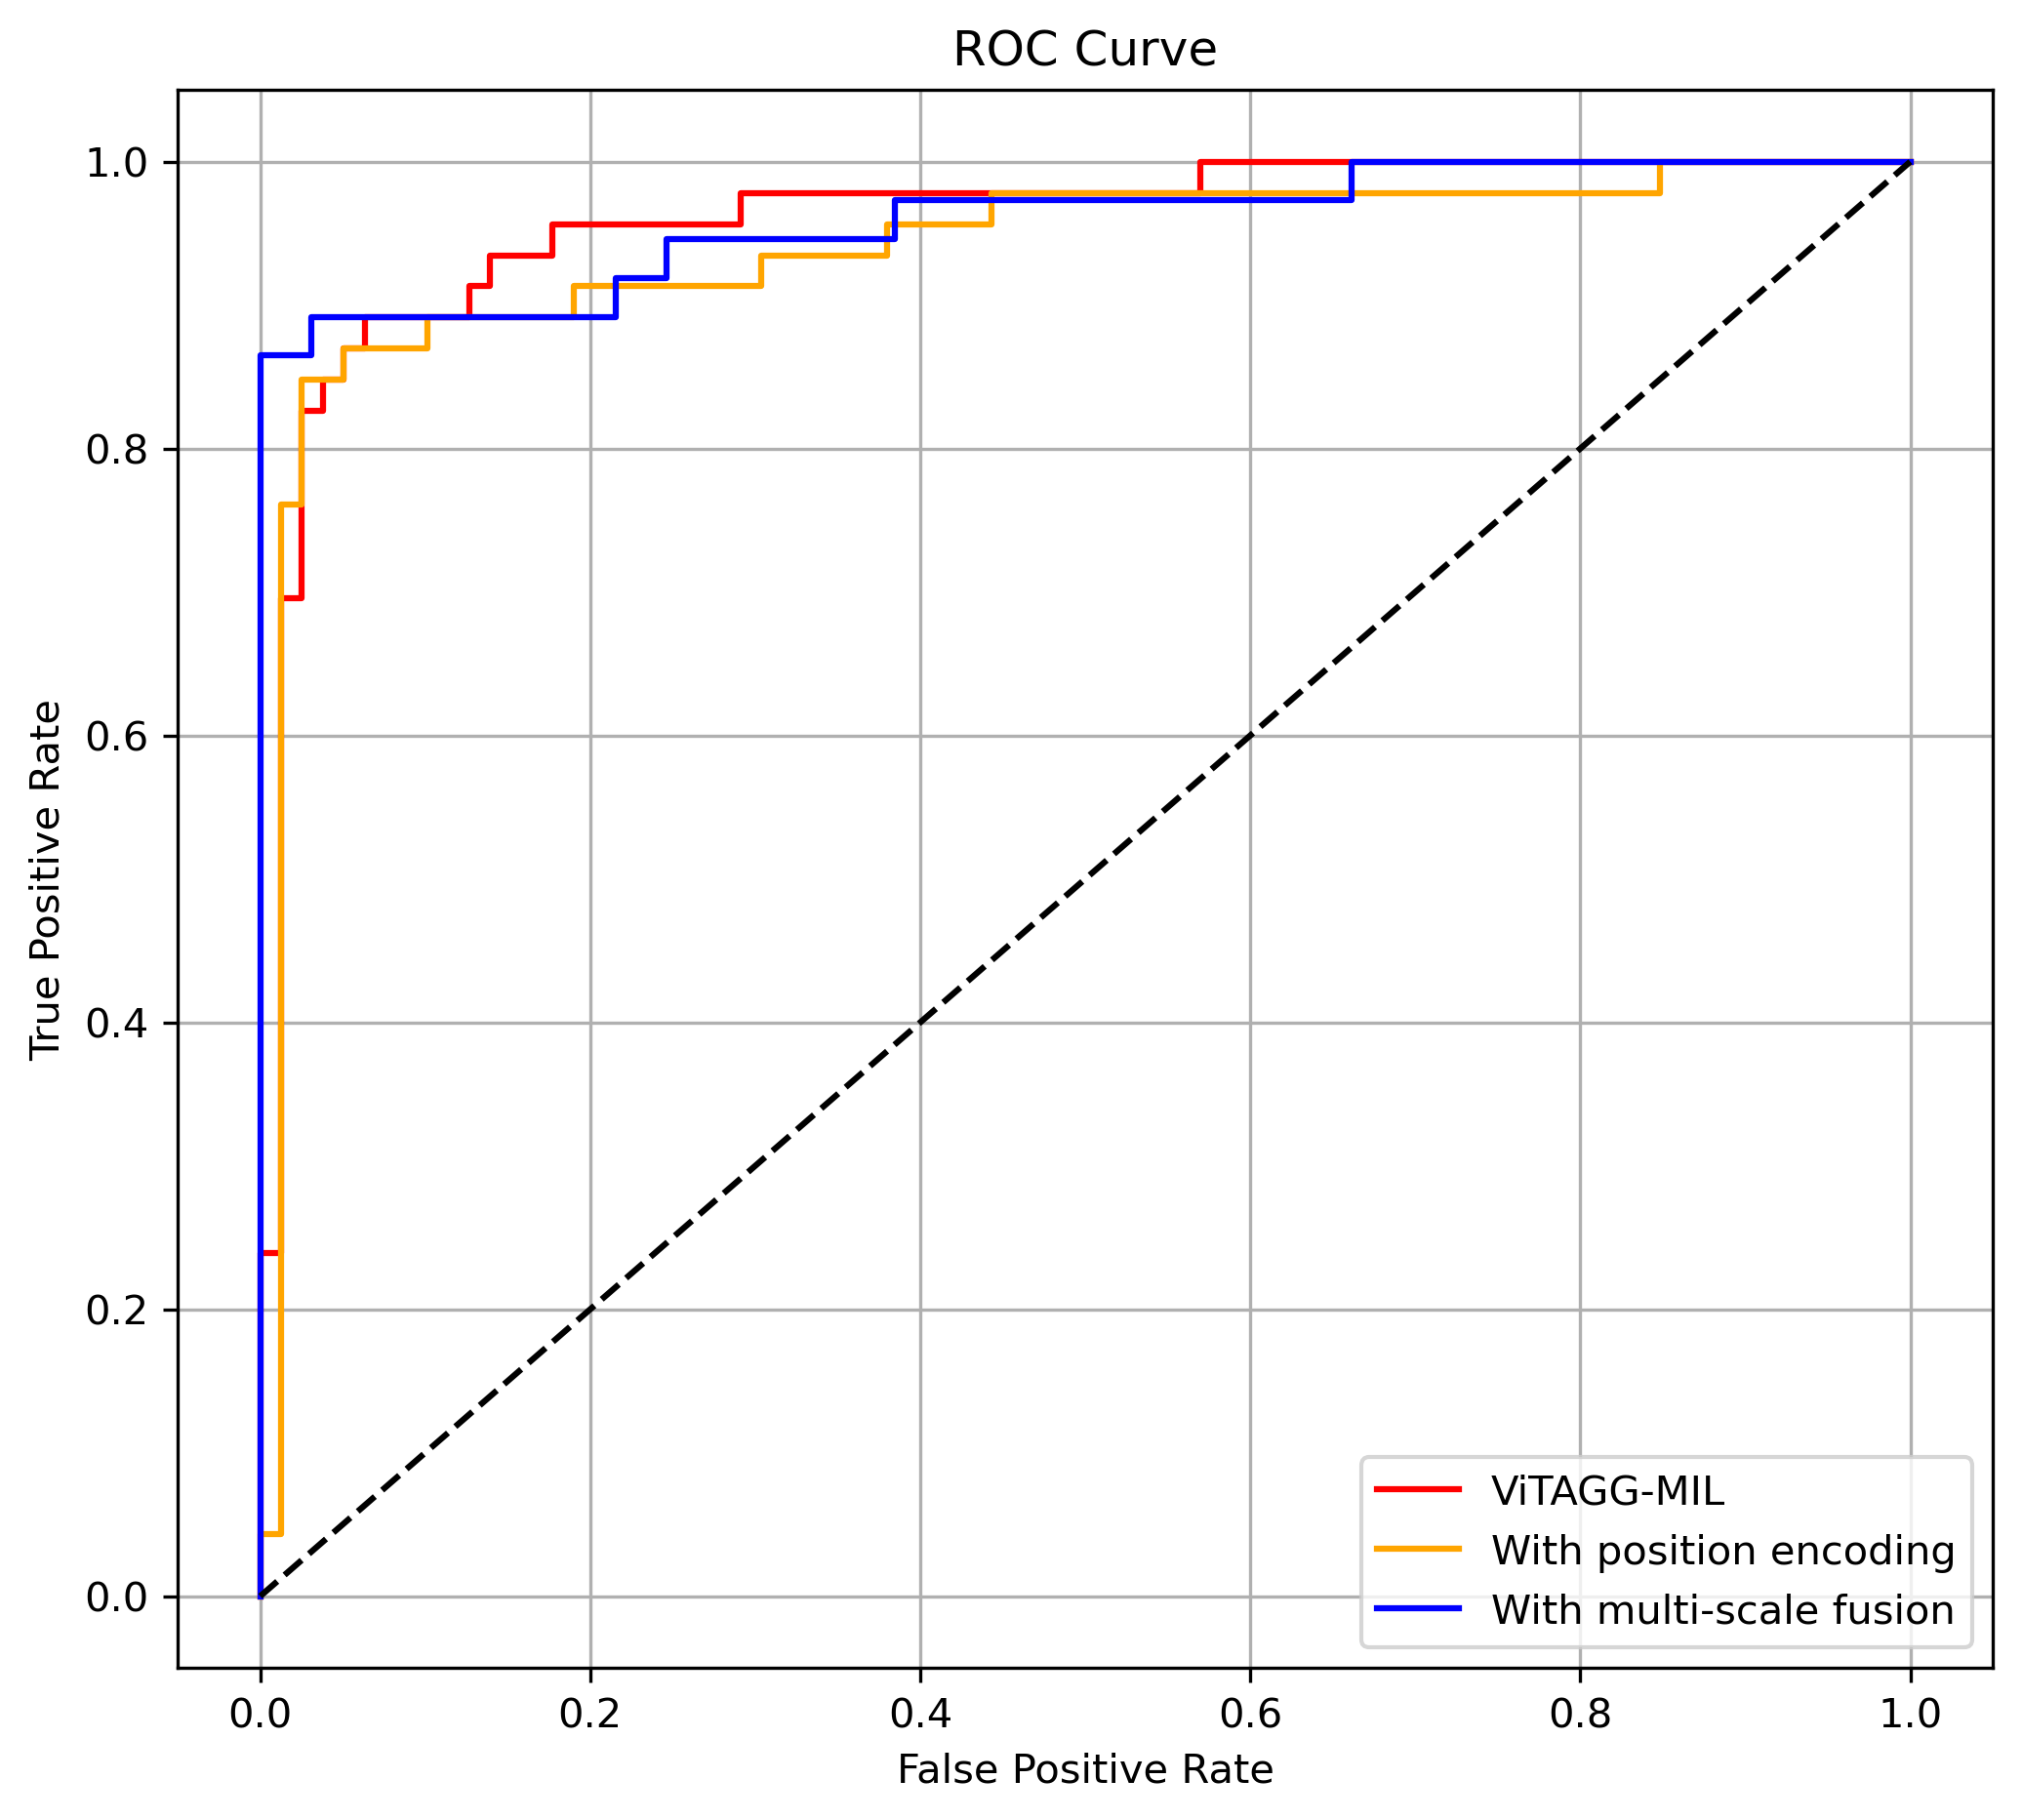

[0.9584199584199584]
[0.49958082735538484]


In [119]:
import numpy as np
import os
import json
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_fscore_support
import scikitplot as skplt
import matplotlib.pyplot as plt

#path = '/data3/ian/dsmil-wsi/dsmil-wsi/predict_logs/C16/vit_05102023_LR_0.008_BLOSS_0.9_POS_0_HEAD_4_BLOCK_8_LANDMARK_512_ms_fusion_1_33.json'
path = '/data3/ian/dsmil-wsi/dsmil-wsi/predict_logs/C16/vit_05152023_LR_0.008_BLOSS_0.9_POS_0_HEAD_4_BLOCK_8_LANDMARK_256_ms_fusion_1_10.json'
gt_path = '/data1/ian/C16_training_small/C16_test_mask/'
gt_list = os.listdir(gt_path)
fp = open(path,'r')
data = json.load(fp)

gt = np.array([])
predict = np.array([])

for k in data:
    if k+'.png' in gt_list:
        gt=np.append(gt,1)
    else:
        gt=np.append(gt ,0)
    predict=np.append(predict,data[k])
    
#print(predict)
#print(gt)

auc_value, _, thresholds_optimal, fpr_fusion, tpr_fusion = multi_label_roc(gt, predict, 1, pos_label=1)
predict = np.where(predict>=thresholds_optimal[0], 1, 0)
f1 = f1_score(gt, predict)
print(f1)

fig  = plt.figure(figsize=(8,7),dpi=300)


plt.plot(fpr_origin, tpr_origin, color = 'red', label = 'ViTAGG-MIL')
plt.plot(fpr_pos, tpr_pos, color = 'orange', label = 'With position encoding')
plt.plot(fpr_fusion, tpr_fusion, color = 'blue', label = 'With multi-scale fusion')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.grid()
plt.title("ROC Curve")
plt.savefig('/data1/ian/pic/C16_ROC.png')

plt.show()  
print(auc_value)
print(thresholds_optimal)

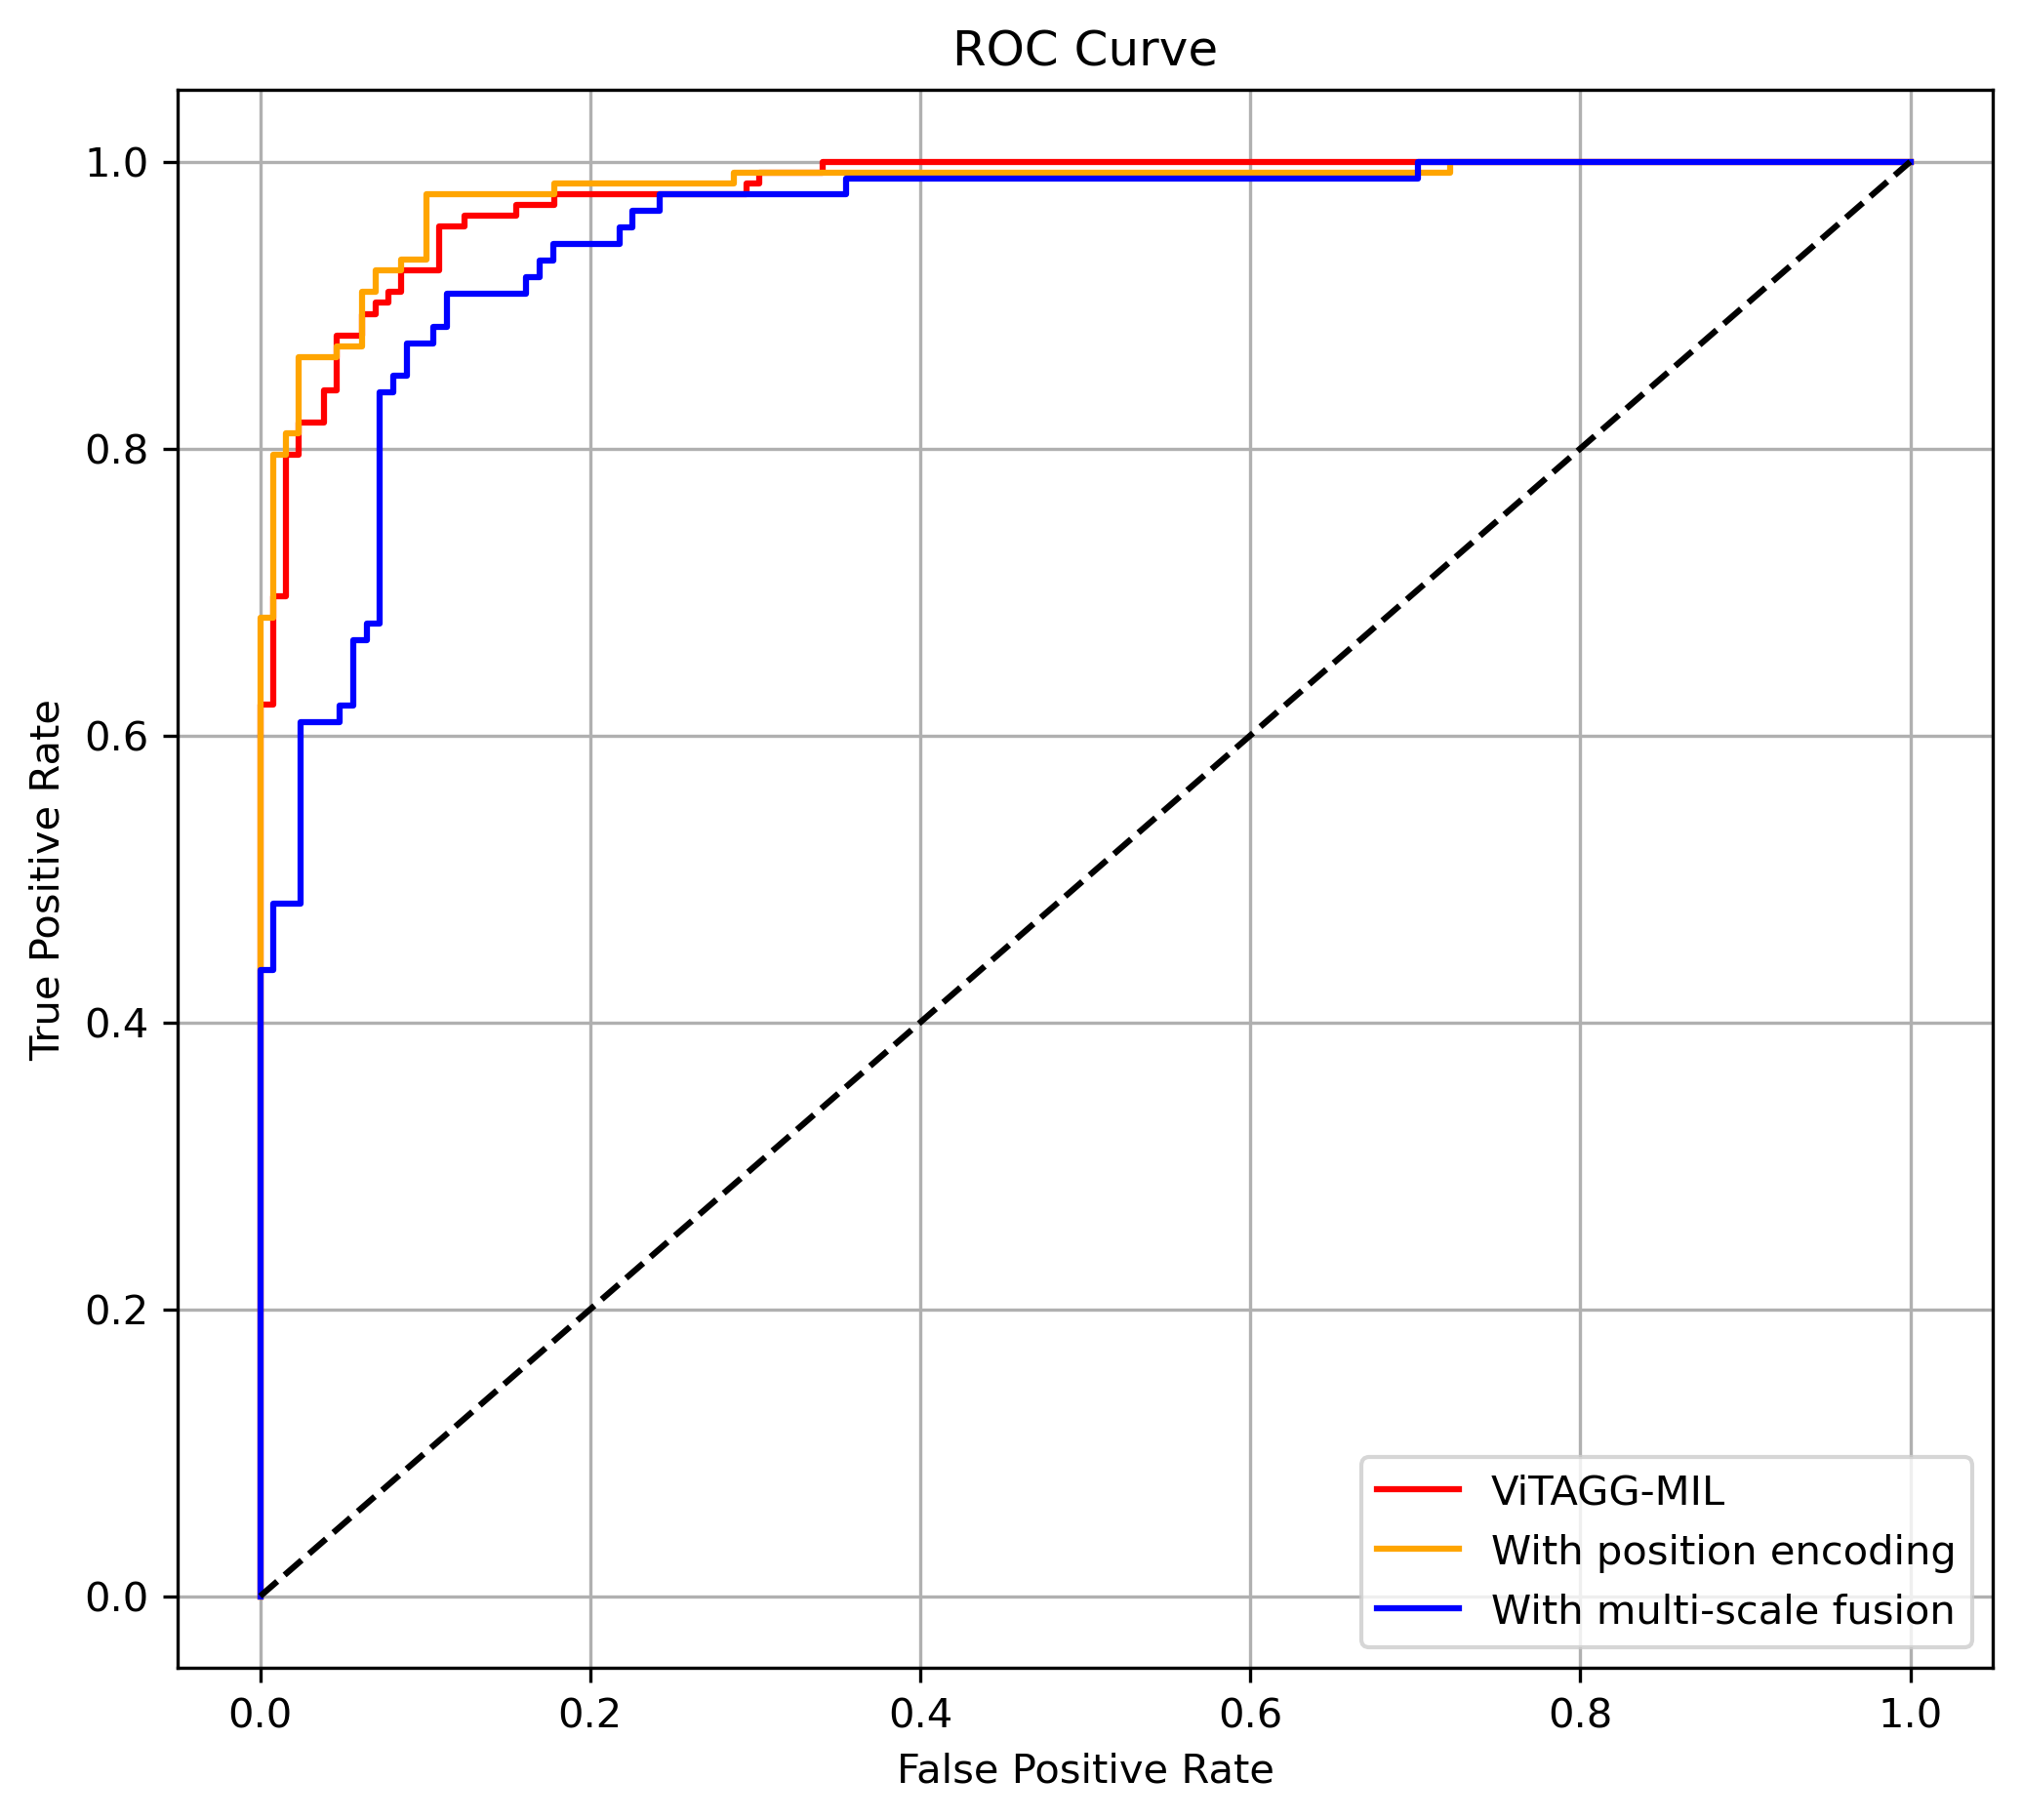

In [121]:
import pickle
base = '/data3/ian/dsmil-wsi/dsmil-wsi/'
files = ['tcga_vit_TCGA_test_0.001_1_False_1_31.pickle', 'tcga_vit_TCGA_test_0.0002_1_False_1_3.pickle', 'tcga_vit_TCGA_ms_test_LR_0.0005_BLOSS_1_POS_0_HEAD_2_BLOCK_4_LANDMARK_1024_ms_1_35.pickle']
fig  = plt.figure(figsize=(8,7),dpi=300)
color = ['red', 'orange', 'blue']
label = ['ViTAGG-MIL', 'With position encoding', 'With multi-scale fusion']
for i, f in enumerate(files):
    f = os.path.join(base, f)
    with open(f, 'rb') as b:
        fpr, tpr = pickle.load(b)

        plt.plot(fpr, tpr, color = color[i], label = label[i])
        

plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.grid()
plt.title("ROC Curve")
#plt.savefig('/data1/ian/pic/C16_ROC.png')
plt.savefig('/data1/ian/pic/TCGA_ROC.png')

plt.show()  
